In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilsVisualize import getModelDataNum
import numpy as np

In [2]:
mode = "TEST"
modelNames = ["p2", "p4", "p8", "p16", "m1", "m2", "m4", "m8", "m16", "m32"]
# visualizeMode = "PHI_MAPE"
# visualizeMode = "PHI_MSE"
# visualizeMode = "FE_DIFFERENCE"
visualizeMode = "PHI_AVE"
cutoffRow = 50

p2 (50, 50)


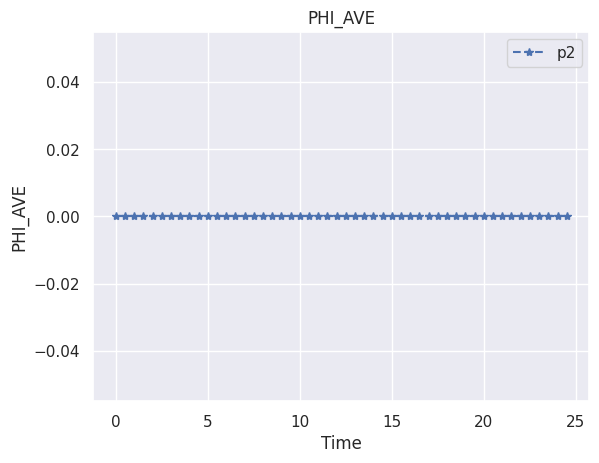

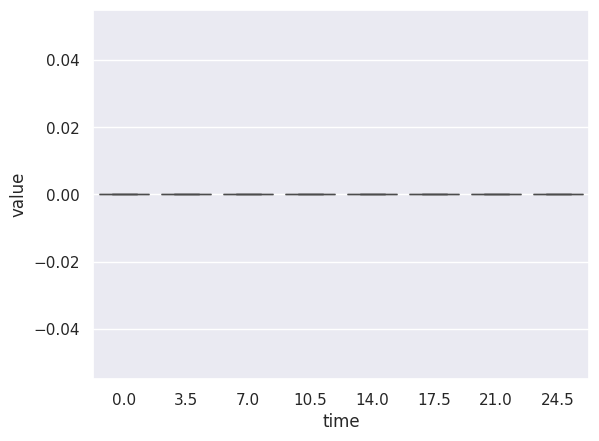

p4 (50, 50)


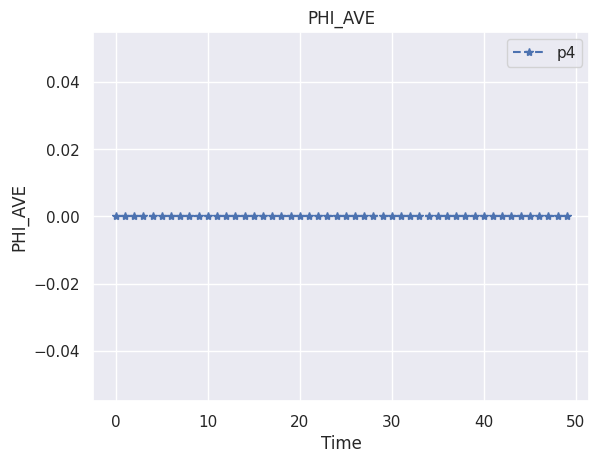

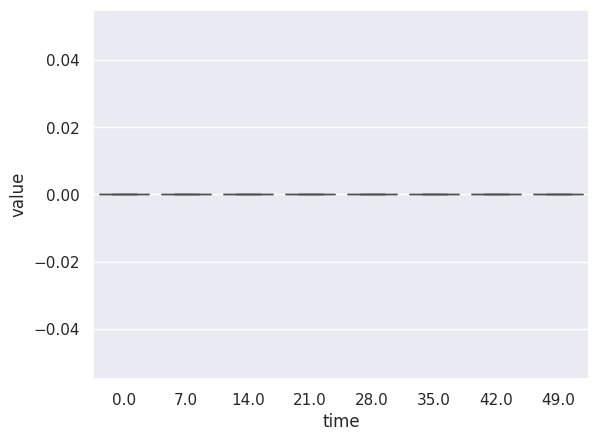

p8 (50, 50)


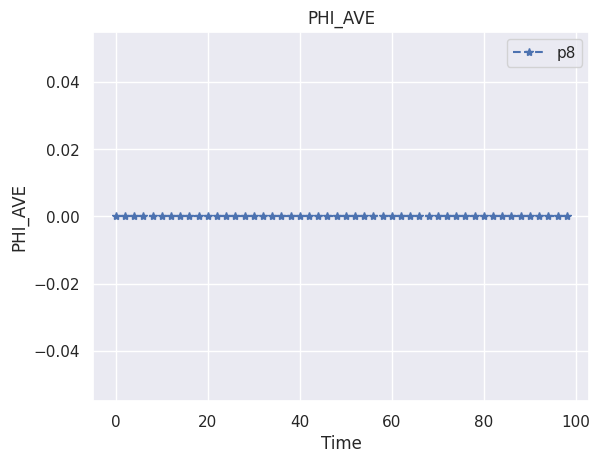

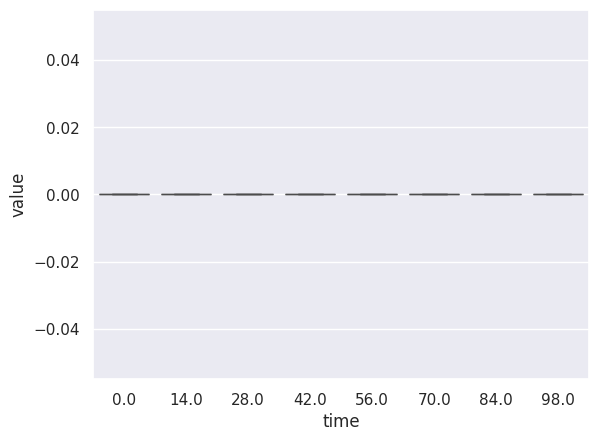

p16 (50, 44)


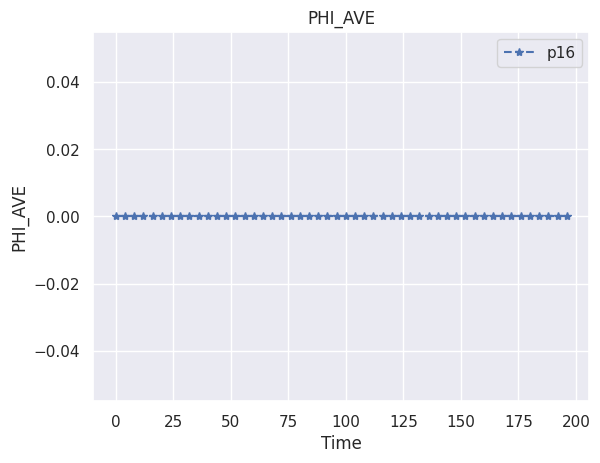

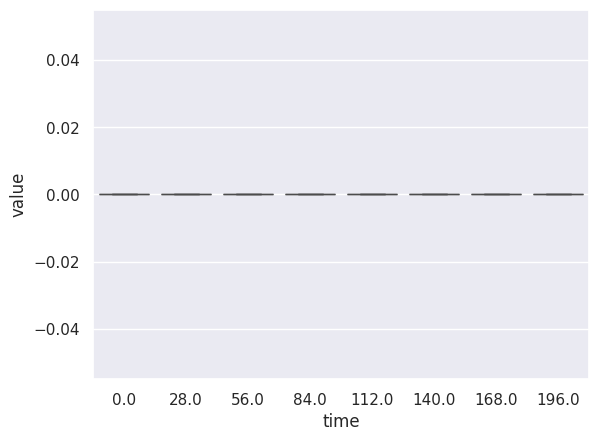

m1 (50, 50)


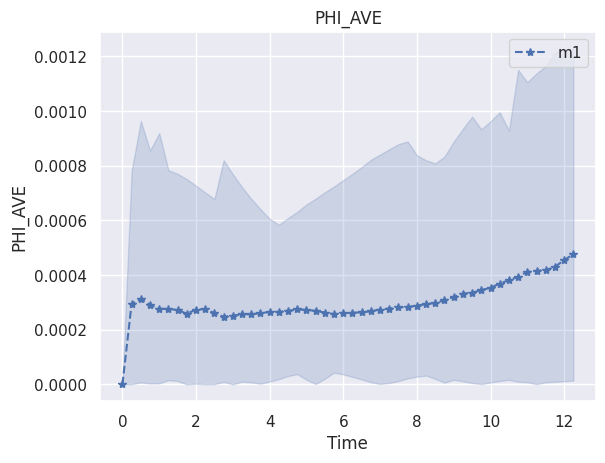

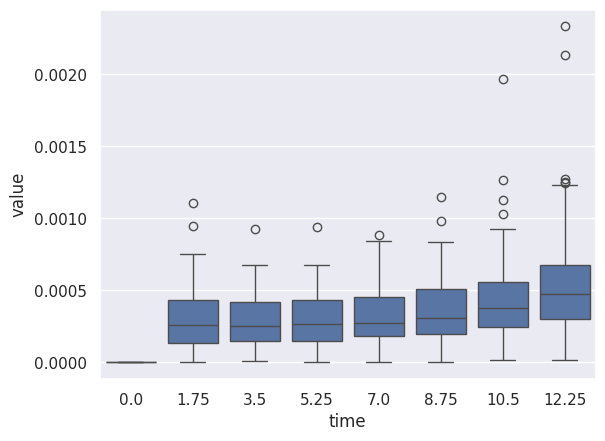

m2 (50, 50)


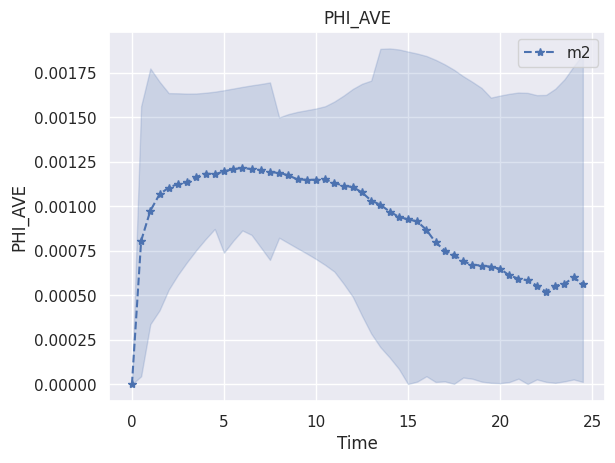

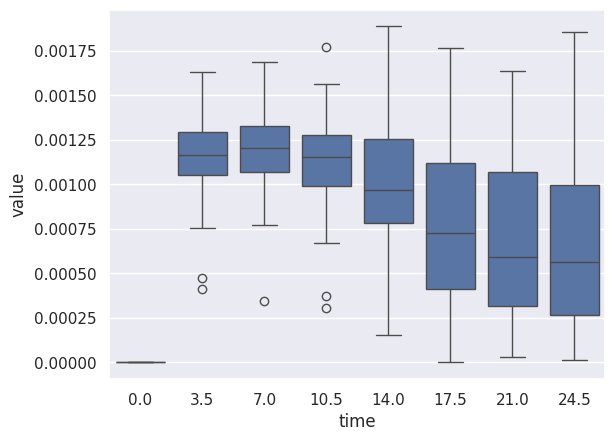

m4 (50, 50)


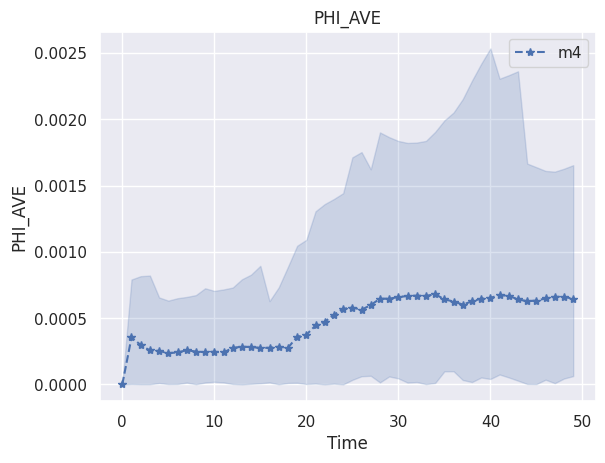

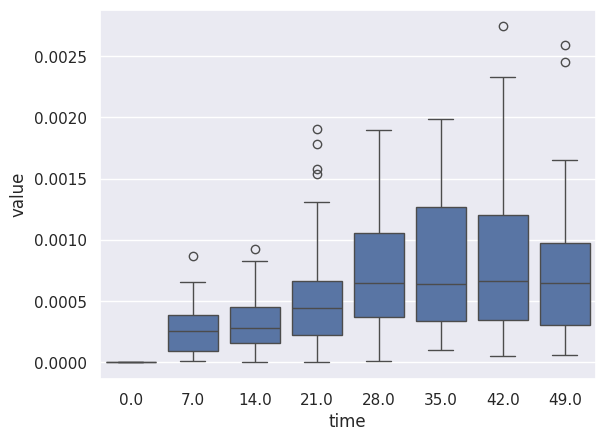

m8 (50, 50)


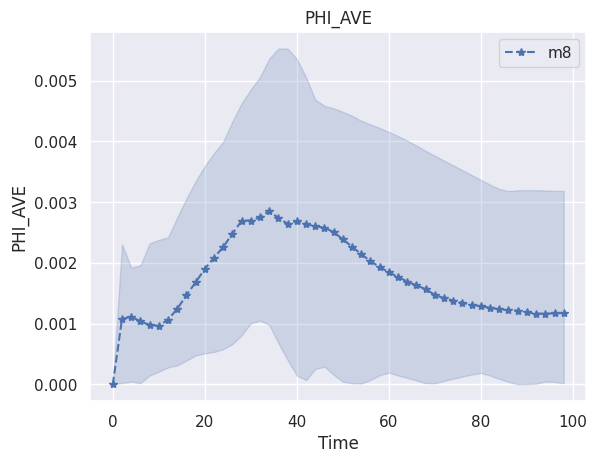

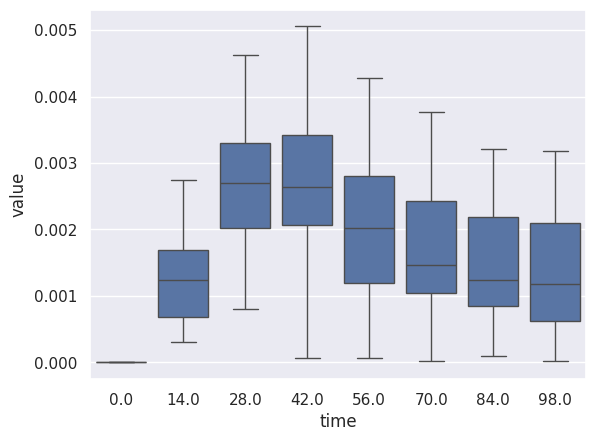

m16 (50, 50)


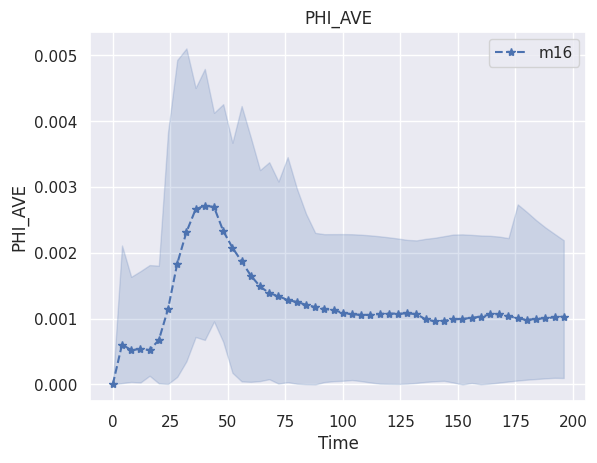

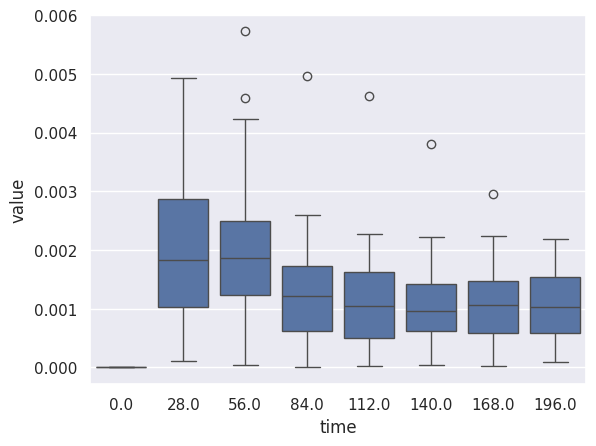

m32 (50, 50)


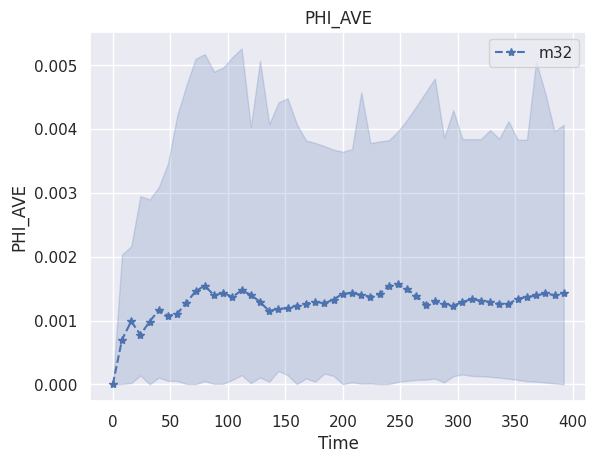

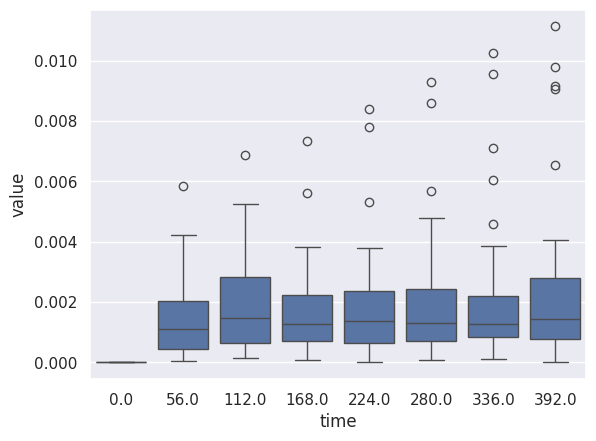

In [3]:
dfLongArray = []
for modelName in modelNames:
    df, dfLong, dfWide = getModelDataNum(
        modelName, mode, visualizeMode=visualizeMode, cutoffRow=cutoffRow
    )
    print(modelName, df.shape)
    dfLongArray.append(dfLong)

    sns.set_theme()
    fig, ax = plt.subplots()
    xp = dfWide.index.values
    yp = dfWide["median"].values
    errU = dfWide["upper_whisker"]
    errL = dfWide["lower_whisker"]

    ax.plot(xp, yp, "--*", label=modelName)
    ax.fill_between(xp, errU, errL, color="b", alpha=0.2)
    ax.set_title(visualizeMode)
    ax.set_xlabel("Time")
    ax.set_ylabel(visualizeMode)
    plt.legend()
    plt.show()

    fig, ax = plt.subplots()
    numBar = 8
    tArrayPred = df.index.values
    idxList = np.linspace(0, tArrayPred.shape[0] - 1, numBar).astype(int)
    tList = tArrayPred[idxList]
    filt = dfLong["time"].isin(tList)
    ax = sns.boxplot(data=dfLong[filt], x="time", y="value", whis=1.5)
    plt.show()


dfLongAppended = pd.concat(dfLongArray)

In [4]:
dfLongAppended.shape

(24700, 4)

<Axes: xlabel='model', ylabel='value'>

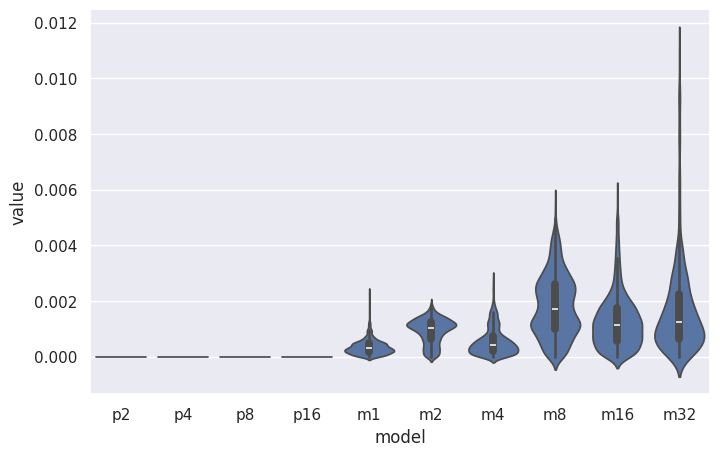

In [5]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8, 5))

# Using density_norm='width' parameter to normalize the violin plot so that they can be compared
# https://stackoverflow.com/a/56357825
sns.violinplot(data=dfLongAppended, x="model", y="value", ax=ax, density_norm='width')